In [5]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


`geom_smooth()` using method = 'loess'


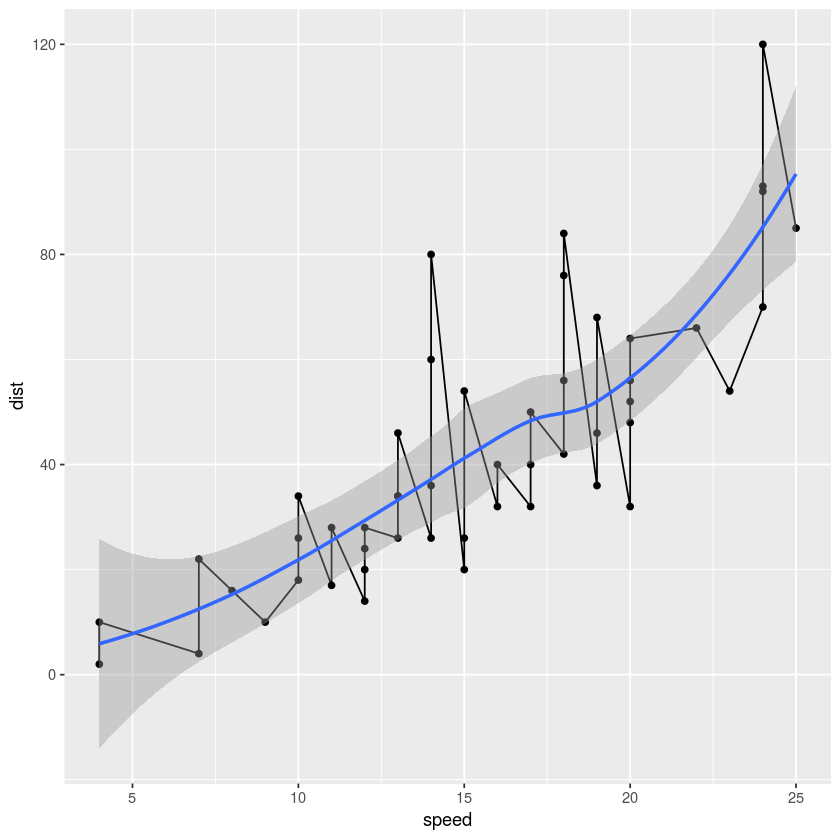

In [11]:
cars %>% ggplot(aes(speed,dist)) + geom_point() + geom_line() + geom_smooth()

In [12]:
library(raster)

Loading required package: sp

Attaching package: ‘raster’

The following object is masked from ‘package:dplyr’:

    select

The following object is masked from ‘package:tidyr’:

    extract



In [14]:
aso <- raster('/home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif')

In [15]:
mlp <- raster('/home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/preds/20180528_181108_1025_3B_AnalyticMS_SR_clip_merged.tif')

In [16]:
s <- stack(aso,mlp)

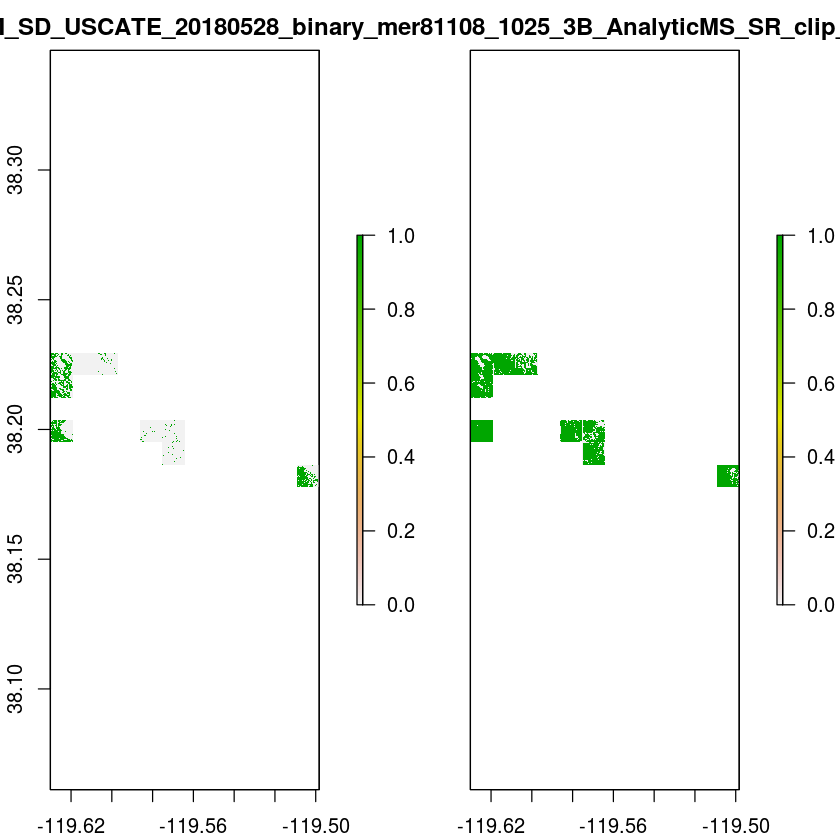

In [17]:
plot(s)

In [18]:
crs(s)

CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 

In [23]:
veg <- raster('~/planet-snowcover/pipeline/veg.tiff')

In [24]:
crs(veg)

CRS arguments:
 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 

In [29]:
s <- stack(aso,mlp)

In [26]:
extent(s)

class       : Extent 
xmin        : -119.6301 
xmax        : -119.4983 
ymin        : 38.17775 
ymax        : 38.22955 

In [51]:
extent(s)

class       : Extent 
xmin        : -119.6301 
xmax        : -119.4983 
ymin        : 38.17775 
ymax        : 38.22955 

In [52]:
extent(outr)

class       : Extent 
xmin        : -119.6301 
xmax        : -119.4983 
ymin        : 38.17775 
ymax        : 38.19435 

In [56]:
s

class       : RasterStack 
dimensions  : 3073, 6144, 18880512, 2  (nrow, ncol, ncell, nlayers)
resolution  : 2.145767e-05, 1.685681e-05  (x, y)
extent      : -119.6301, -119.4983, 38.17775, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
names       : ASO_3M_SD_USCATE_20180528_binary_merged, X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged 
min values  :                                  -32768,                                             -32768 
max values  :                                   32767,                                              32767 


In [57]:
aso

class       : RasterLayer 
dimensions  : 3073, 6144, 18880512  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.685681e-05  (x, y)
extent      : -119.6301, -119.4983, 38.17775, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/s3:::planet-snowcover-analysis:planet-snowcover-2020-03-01-13-37-37-330:planet-snowcover-imagery-veg:20180528_181108_1025_3B_AnalyticMS_SR_clip/mask/ASO_3M_SD_USCATE_20180528_binary_merged.tif 
names       : ASO_3M_SD_USCATE_20180528_binary_merged 
values      : -32768, 32767  (min, max)


In [64]:
veg_re <- projectRaster(veg, s)
vegResamp <- resample(veg_re, s, resample='bilinear')

In [69]:
veg_crop<-crop(vegResamp,extent(s))



In [70]:
veg_crop

class       : RasterLayer 
dimensions  : 3073, 6144, 18880512  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.685681e-05  (x, y)
extent      : -119.6301, -119.4983, 38.17775, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : veg 
values      : 0, 25.92235  (min, max)


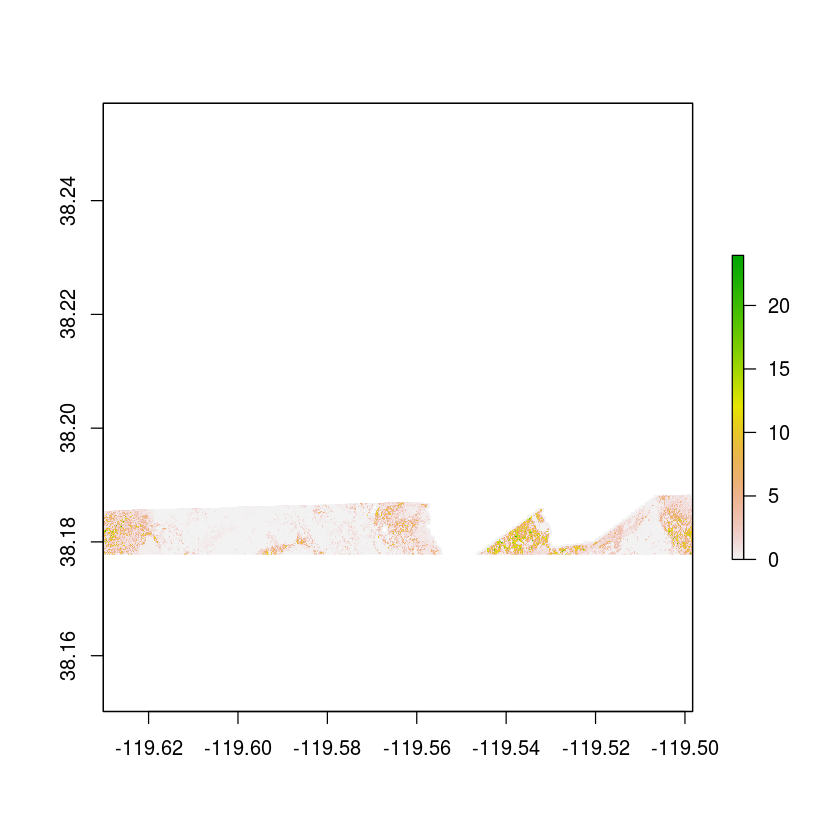

In [67]:
plot(veg_crop)

In [71]:
allthree <- stack (s,veg_crop)

In [73]:
data_matrix <- rasterToPoints(allthree)
head(data_matrix)

x,y,ASO_3M_SD_USCATE_20180528_binary_merged,X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged,veg
-119.6301,38.22954,1,0,NA
-119.6301,38.22954,1,0,NA
-119.6301,38.22954,1,0,NA
-119.6301,38.22954,1,0,NA
-119.6300,38.22954,1,0,NA
-119.6300,38.22954,1,0,NA


In [76]:
datafra_comb <- data_matrix %>% as.data.frame()

In [77]:
str(datafra_comb)

'data.frame':	4587908 obs. of  5 variables:
 $ x                                                 : num  -120 -120 -120 -120 -120 ...
 $ y                                                 : num  38.2 38.2 38.2 38.2 38.2 ...
 $ ASO_3M_SD_USCATE_20180528_binary_merged           : num  1 1 1 1 1 1 1 1 1 1 ...
 $ X20180528_181108_1025_3B_AnalyticMS_SR_clip_merged: num  0 0 0 0 0 0 0 0 0 0 ...
 $ veg                                               : num  NA NA NA NA NA NA NA NA NA NA ...


In [79]:
datafra_comb %>% filter(veg >2 & veg < 10) %>% tally()

n
432995


In [80]:
datafra_comb %>% filter(veg >10 ) %>% tally()

n
51816


In [81]:
datafra_comb %>% filter(veg <2 ) %>% tally()

n
2020117


In [82]:
datafra_comb %>% filter(is.na(veg)  ) %>% tally()

n
2082980


In [85]:
colnames(datafra_comb) <- c('x','y','aso','mlp','veg')

In [86]:
datafra_comb %>% filter(is.na(aso)  ) %>% tally()

n
2227588


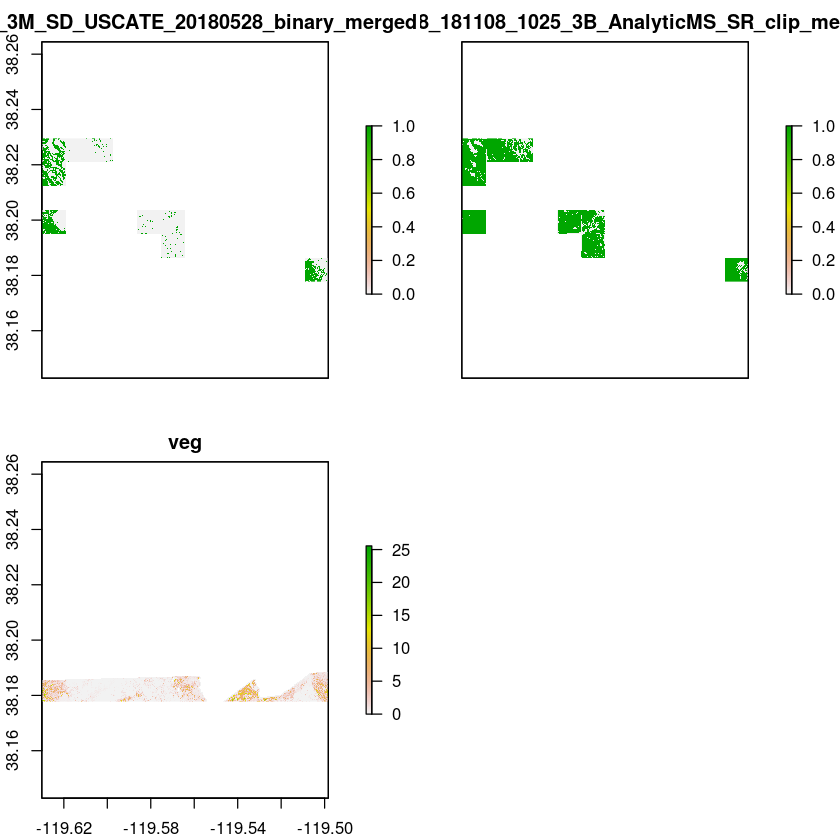

In [61]:
plot(allthree)

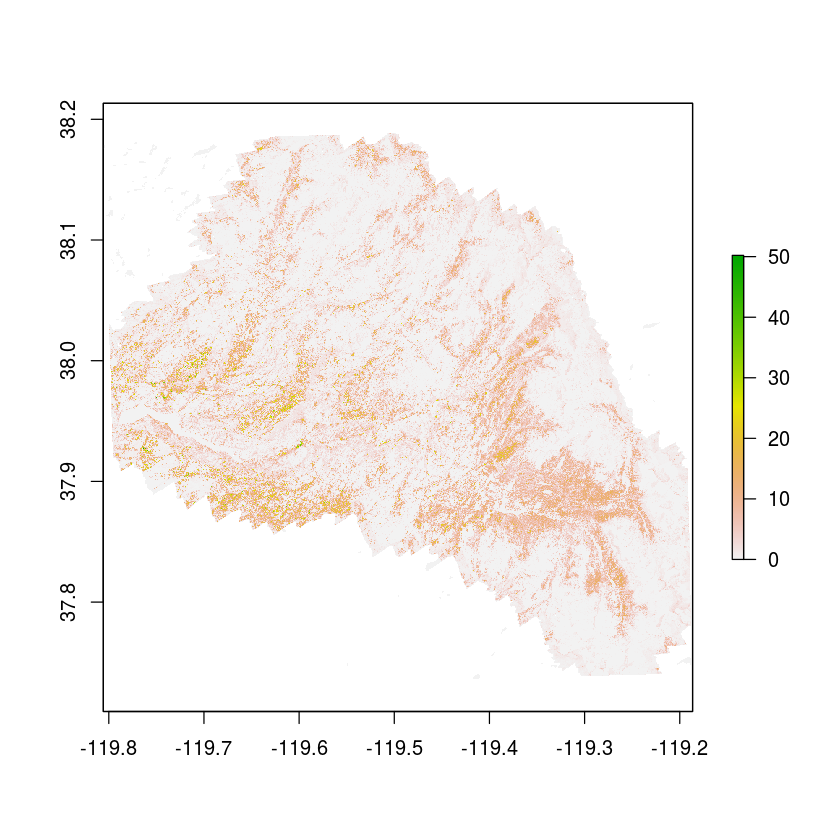

In [62]:
plot(veg)

In [31]:
extent(veg_crop)

class       : Extent 
xmin        : -119.6301 
xmax        : -119.4983 
ymin        : 38.17775 
ymax        : 38.19435 

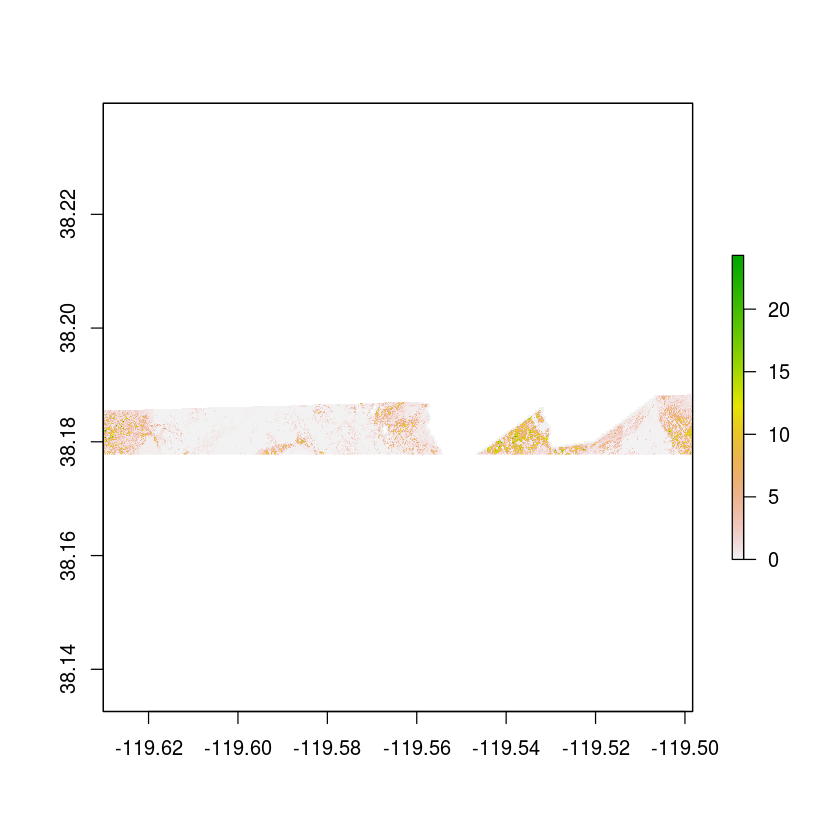

In [32]:
plot(veg_crop)

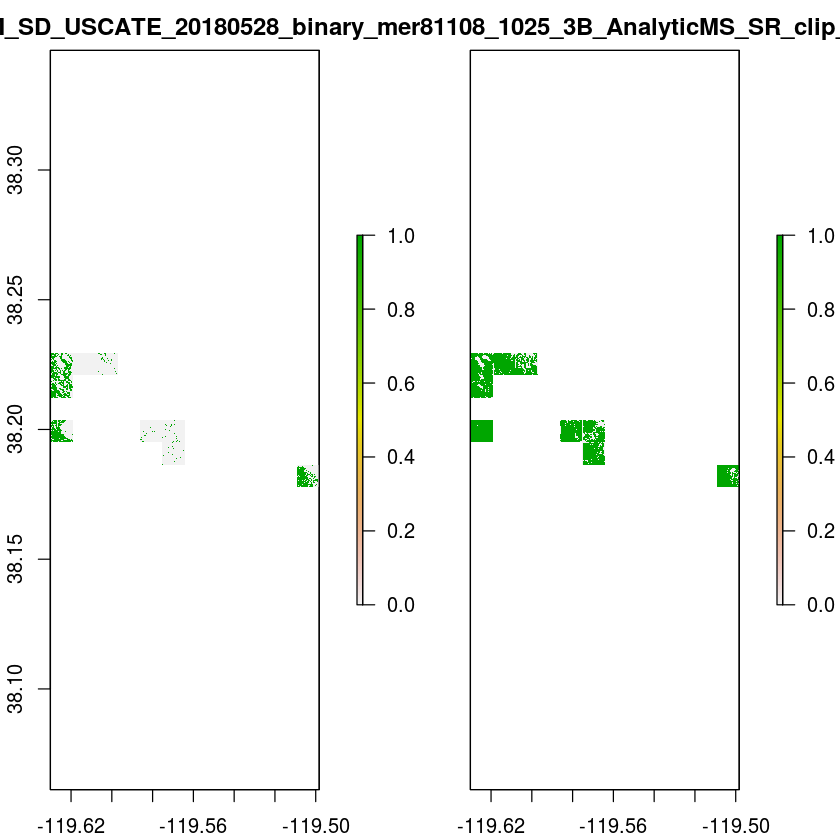

In [33]:
plot(s)

In [36]:
compareRaster(s,veg_crop)

ERROR: Error in compareRaster(s, veg_crop): different extent
